In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics opencv-python matplotlib easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr # to read data from objects on images

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 227MB/s]


In [26]:
image_path = '/content/drive/MyDrive/Large vision/Cars_plate/car2.jpg'

In [27]:
image = cv2.imread(image_path)
results = model.predict(image)
reader = easyocr.Reader(['en'])
result = results[0]
result


0: 352x640 2 cars, 2788.8ms
Speed: 3.6ms preprocess, 2788.8ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

The car Plate texts which detected: 
Car number: 2 BE
Car number: NOT2B


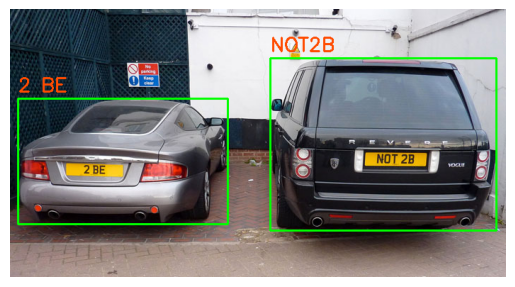

In [35]:
licence_plate_text = []
for box in result.boxes:
  x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
  class_id = int(box.cls.tolist()[0])
  labels = result.names[class_id]

  if labels in ['car', 'bus', 'vehicle']:
    license_plate_img = image[y1:y2, x1:x2]
    license_plate_gray_image = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)
    _, license_plate_binary_img = cv2.threshold(license_plate_gray_image, 128, 255, cv2.THRESH_BINARY_INV)
    # plt.imshow(license_plate_gray_image)
    # plt.show()
    # plt.imshow(license_plate_binary_img)
    # plt.show()

    plate_text = reader.readtext(license_plate_binary_img, detail = 0)
    plate_text_combined = ' '.join(plate_text)
    if plate_text_combined:
      licence_plate_text.append(plate_text_combined)
      cv2.rectangle(image, (x1,y1), (x2,y2), (0,255,0), 2)
      cv2.putText(image, plate_text_combined, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,75,255), 2)
if licence_plate_text:
    print('The car Plate texts which detected: ')
    for i, plate_text in enumerate(licence_plate_text, 1):
        print(f'Car number: {plate_text}')
else:
    print('No Car Detected!!')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) ## To convert image to RGB because plt libaray display only RGB images
plt.axis('off')
plt.show()



In [42]:
def plate_detection(image_path):
    image = cv2.imread(image_path)
    model = YOLO('yolov8x.pt')
    results = model.predict(image)
    reader = easyocr.Reader(['en'])
    result = results[0]

    licence_plate_text = []
    for box in result.boxes:
      x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
      class_id = int(box.cls.tolist()[0])
      labels = result.names[class_id]

      if labels in ['car', 'bus', 'vehicle']:
        license_plate_img = image[y1:y2, x1:x2]
        license_plate_gray_image = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)
        _, license_plate_binary_img = cv2.threshold(license_plate_gray_image, 128, 255, cv2.THRESH_BINARY_INV)
        # plt.imshow(license_plate_gray_image)
        # plt.show()
        # plt.imshow(license_plate_binary_img)
        # plt.show()

        plate_text = reader.readtext(license_plate_binary_img, detail = 0)
        plate_text_combined = ' '.join(plate_text)
        if plate_text_combined:
          licence_plate_text.append(plate_text_combined)
          cv2.rectangle(image, (x1,y1), (x2,y2), (0,255,0), 2)
          cv2.putText(image, plate_text_combined, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,75,255), 2)
      if licence_plate_text:
         print('The car Plate texts which detected: ')
         for i, plate_text in enumerate(licence_plate_text, 1):
          print(f'Car number: {plate_text}')
      else:
         print('No Car Detected!!')

      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) ## To convert image to RGB because plt libaray display only RGB images
      plt.axis('off')
      plt.show()



0: 448x640 1 person, 1 car, 1 backpack, 3266.7ms
Speed: 4.8ms preprocess, 3266.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


No Car Detected!!


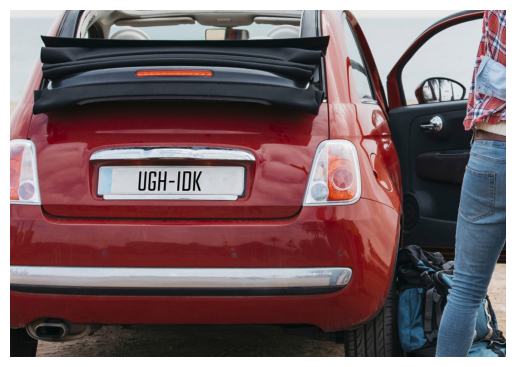

The car Plate texts which detected: 
Car number: ugH-Idk


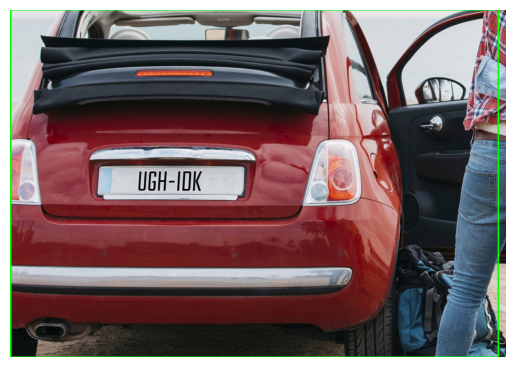

The car Plate texts which detected: 
Car number: ugH-Idk


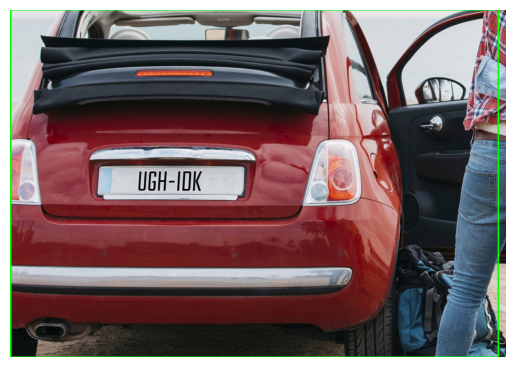

In [44]:
image_path = '/content/drive/MyDrive/Large vision/Cars_plate/carr.jpg'
plate_detection(image_path)


0: 640x480 1 car, 3534.7ms
Speed: 4.0ms preprocess, 3534.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


The car Plate texts which detected: 
Car number: E796 KOY


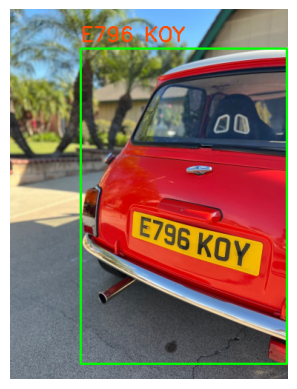

In [43]:
image_path = '/content/drive/MyDrive/Large vision/Cars_plate/car.jpg'
plate_detection(image_path)